In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
labels = ['thinking', 'reading', 'phone call', 'group study', 'eating', 'group chatting', 'seminar', 'progress meeting', 'technical discussion']
df = pd.read_csv('./SeminarRoom_Labeling.csv')

In [3]:
df['start'] = df.start.apply(lambda x: datetime.strptime(x, "%H:%M:%S"))
df['end'] = df.end.apply(lambda x: datetime.strptime(x, "%H:%M:%S"))

In [4]:
df['duration'] = df['end'] - df['start']
df['count'] = df['count'].apply(lambda x: x.split('~')[0])
df['count'] = df['count'].astype('int')
df['duration'] = df['duration'].apply(lambda x: x.seconds) / 60
df['label'] = df['label'].apply(lambda x: x.lower())
df = df[df['label'] != '?']

In [5]:
# pd.set_option('display.max_rows', None)

## boxplot for number of people

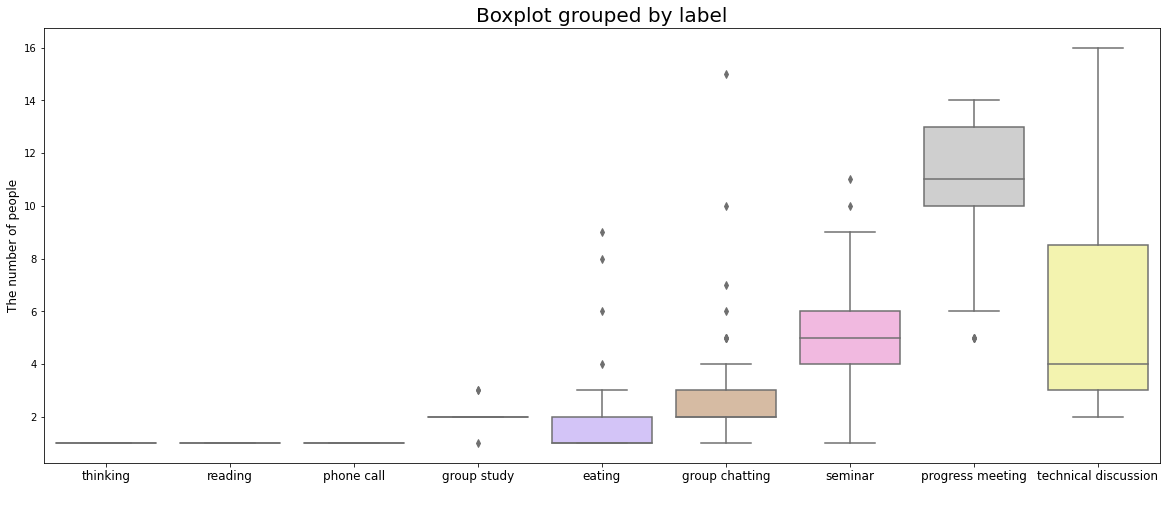

In [71]:
parameters = {'xtick.labelsize': 12,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)
plt.figure(figsize=(20, 8))
sns.set_palette("pastel")
sns.boxplot(x = "label", y = "count", data = df, order=labels)
plt.title("Boxplot grouped by label")
plt.xlabel(' ', fontsize=12)
plt.ylabel('The number of people', fontsize=12)
plt.show()

## boxplot for duration

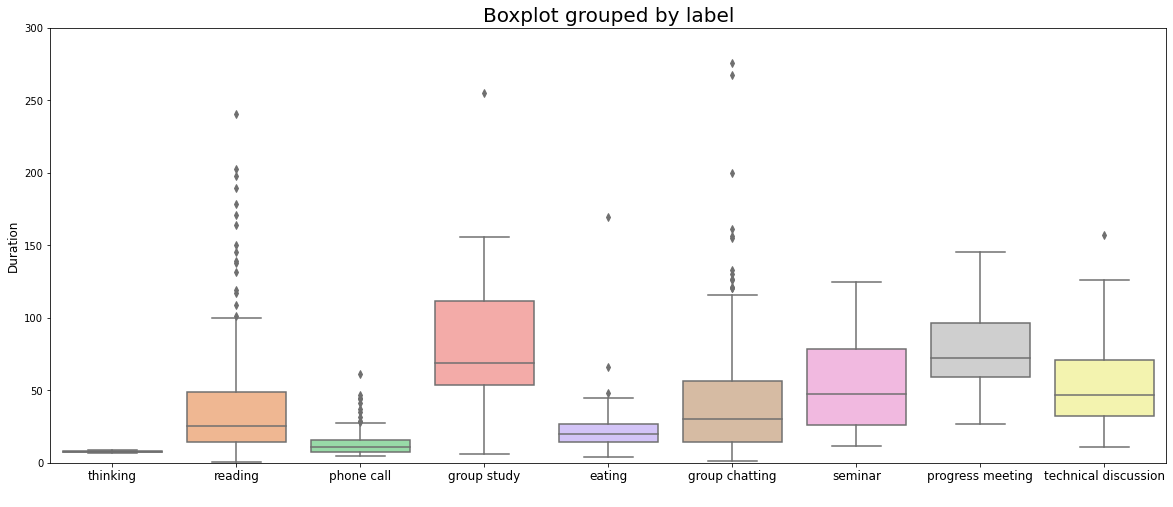

In [72]:
parameters = {'xtick.labelsize': 12,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)
plt.figure(figsize=(20, 8))
sns.set_palette("pastel")
sns.boxplot(x = "label", y = "duration", data = df, order=labels)
plt.title("Boxplot grouped by label")
plt.xlabel(' ', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.ylim(0, 300)
plt.show()

## the number of episode by label

In [8]:
df.groupby(df['label'])['file_name'].count()

label
eating                   63
group chatting          166
group study              21
phone call              155
progress meeting         31
reading                 219
seminar                  34
technical discussion     43
thinking                  2
Name: file_name, dtype: int64

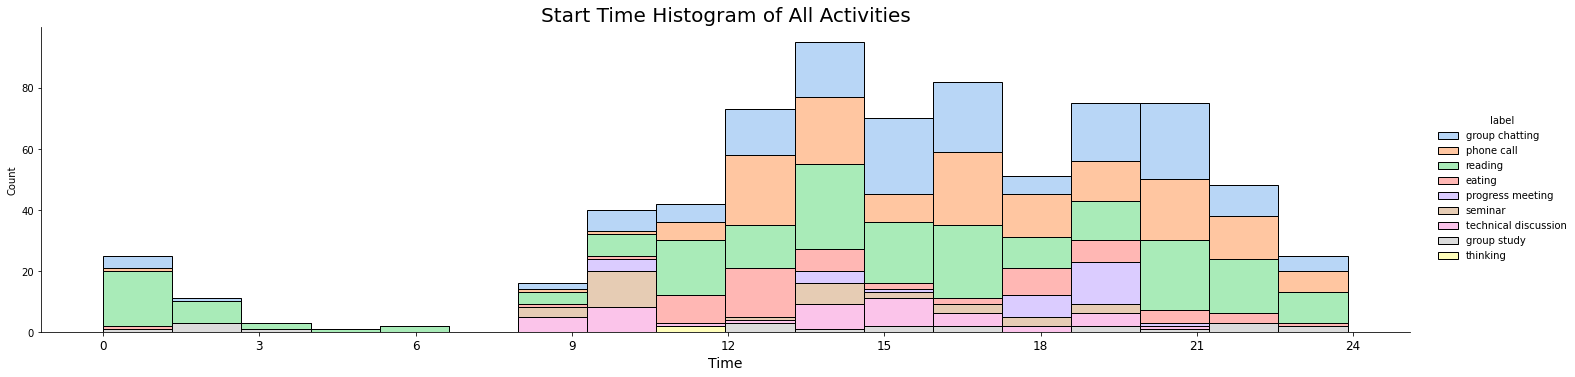

In [70]:
xlabels = [str(i) for i in range(0, 25, 3)]
sns.set_palette("pastel")
g = sns.displot(data=df, kde=False, aspect=4, x="start", hue="label", multiple="stack")
g.set_xticklabels(xlabels)

plt.title("Start Time Histogram of All Activities")
plt.xlabel('Time', fontsize=14)
plt.show()

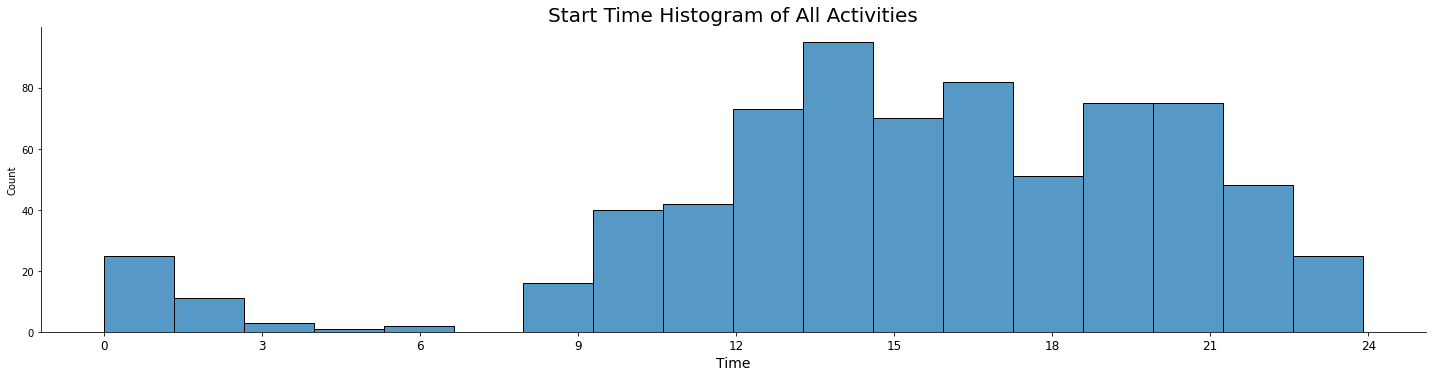

In [44]:
xlabels = [str(i) for i in range(0, 25, 3)]
g = sns.displot(df["start"], kde=False, aspect=4)
g.set_xticklabels(xlabels)

plt.title("Start Time Histogram of All Activities")
plt.xlabel('Time', fontsize=14)
plt.show()

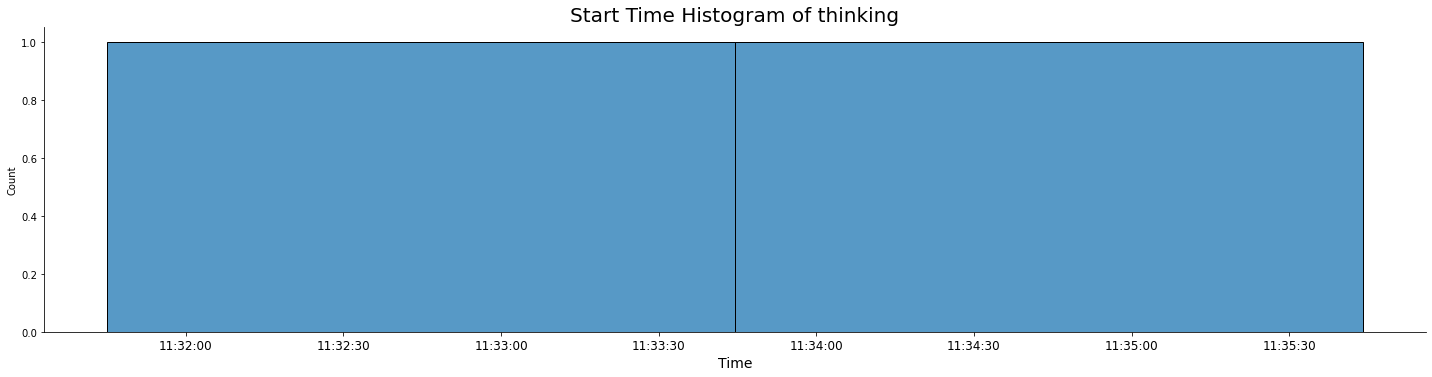

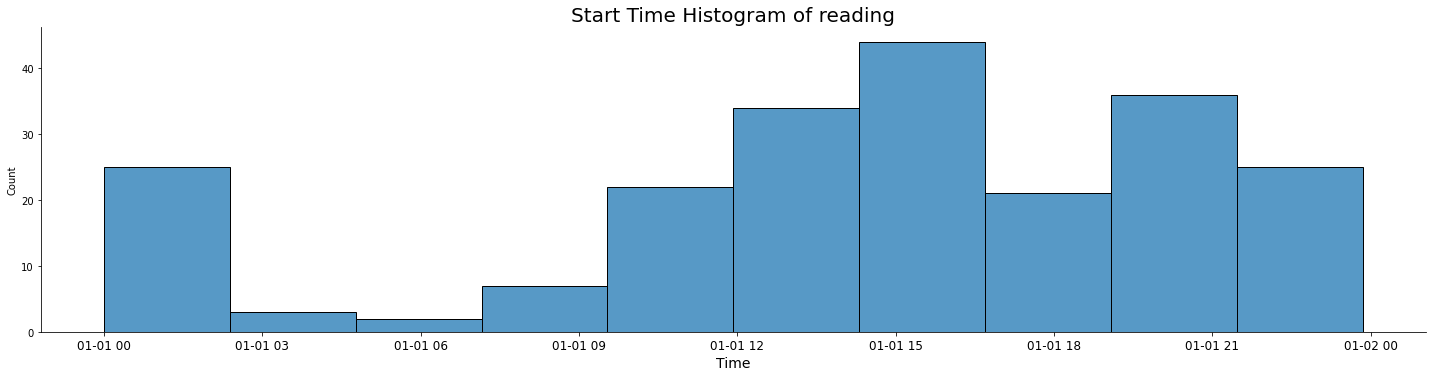

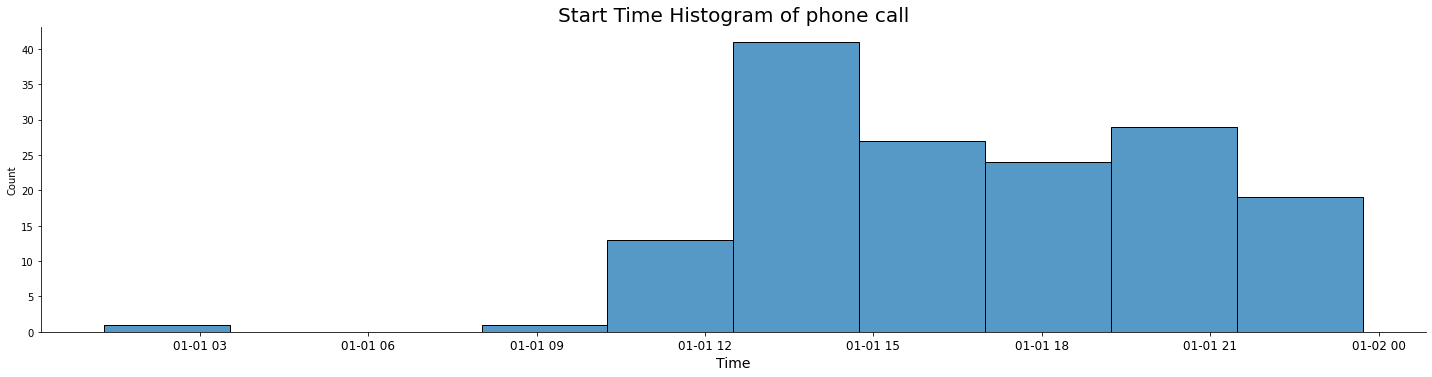

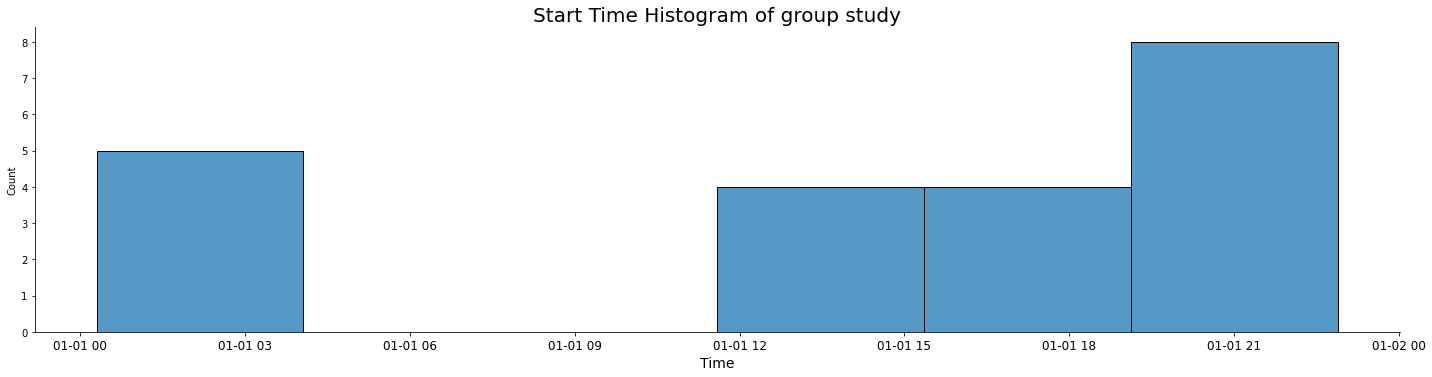

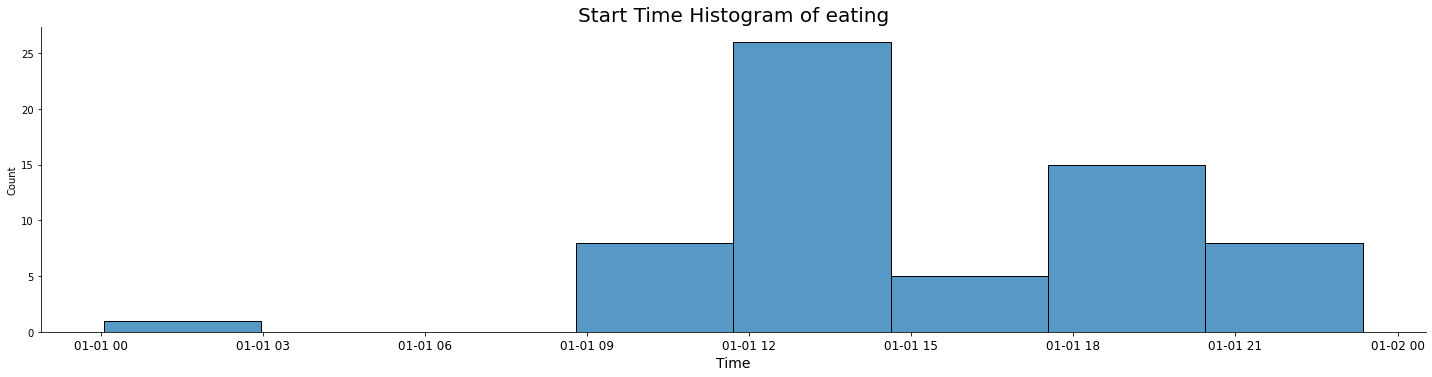

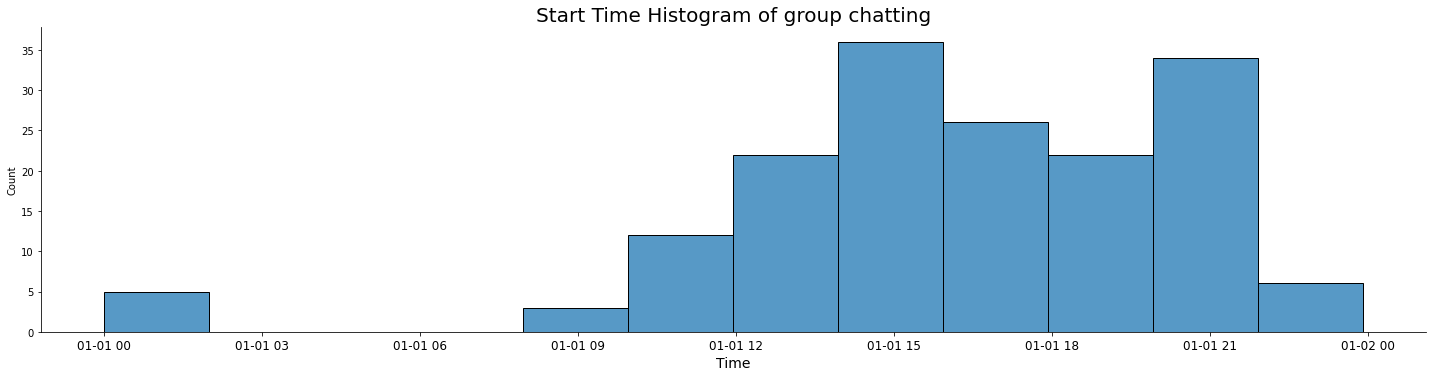

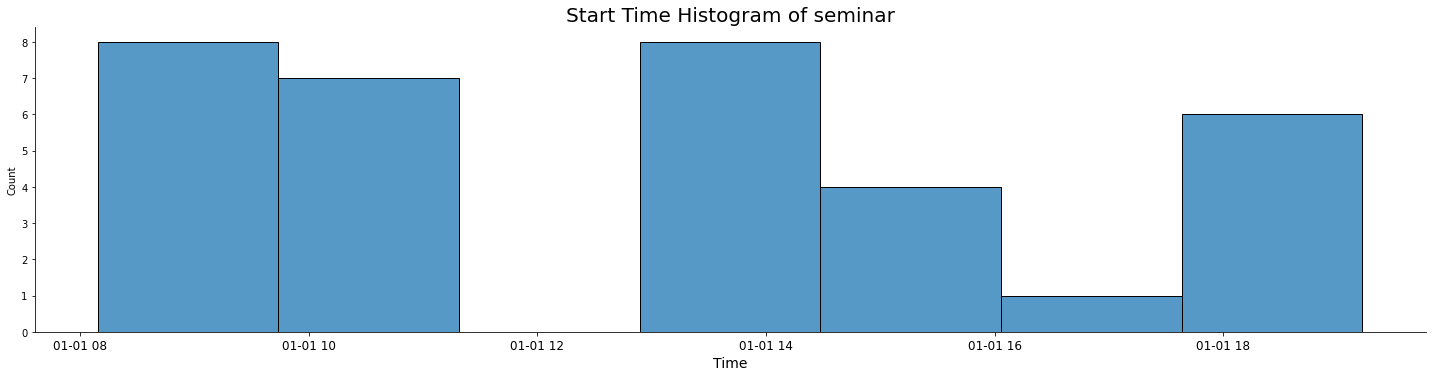

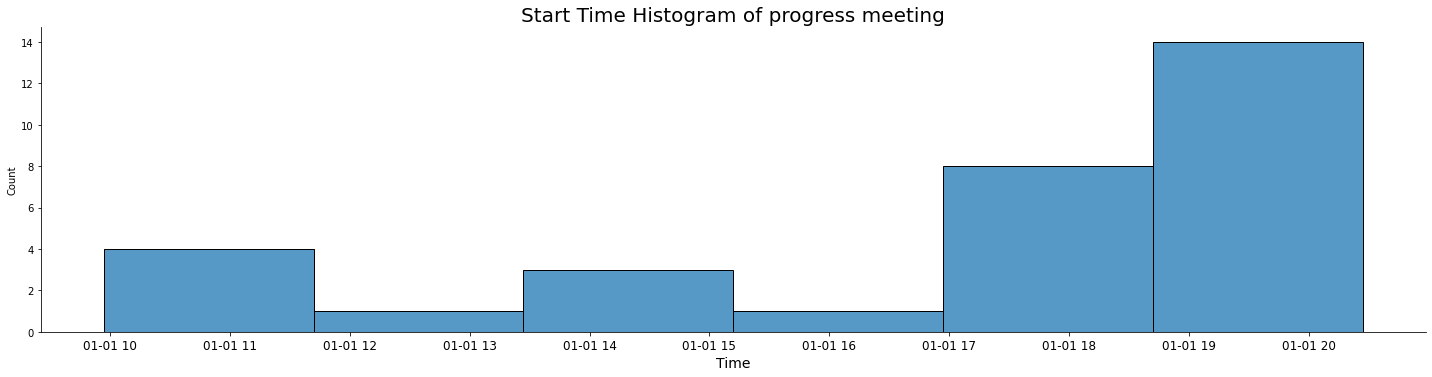

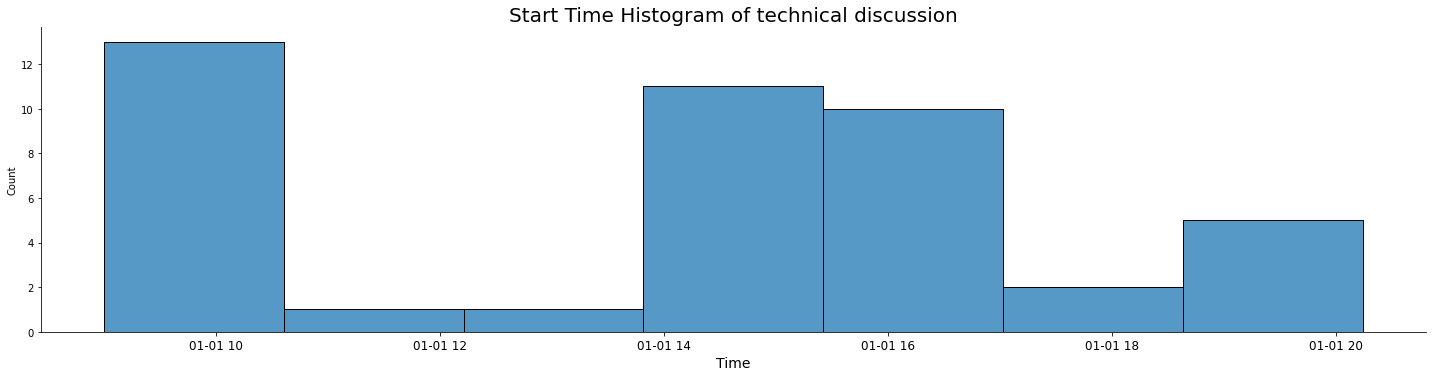

In [59]:
for label in labels:
    xlabels = [str(i) for i in range(0, 25, 3)]
    g = sns.displot(df[df['label'] == label]["start"], kde=False, aspect=4)
    # g.set_ticks(range(len(xlabels)))
    # g.set_xticklabels(xlabels)

    plt.title(f'Start Time Histogram of {label}')
    plt.xlabel('Time', fontsize=14)
    plt.show()

In [49]:
xlabels

['0', '3', '6', '9', '12', '15', '18', '21', '24']

In [51]:
df[df['label'] == label]["start"]

597   1900-01-01 11:31:45
617   1900-01-01 11:35:44
Name: start, dtype: datetime64[ns]

In [52]:
label

'thinking'

In [53]:
df['start']

0     1900-01-01 11:05:05
1     1900-01-01 13:02:15
2     1900-01-01 13:26:04
3     1900-01-01 16:28:22
4     1900-01-01 13:42:24
              ...        
731   1900-01-01 10:15:11
732   1900-01-01 11:26:44
733   1900-01-01 12:42:23
734   1900-01-01 15:39:45
735   1900-01-01 14:43:23
Name: start, Length: 734, dtype: datetime64[ns]